## Creates a pie chart for distribution of product complaints

In [1]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Only needed if you're using a Jupyter Notebook
init_notebook_mode(connected=True)

# Load the dataset
df = pd.read_csv("complaint_cleaned.csv")

# Calculate percentage of product discussions
p_product_discussions = round(df["Product"].value_counts() / len(df["Product"]) * 100, 2)

# Prepare data for the pie chart
labels = list(p_product_discussions.index)
values = p_product_discussions.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', 
          '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']

# Create pie chart
product_pie = go.Pie(
    labels=labels,
    values=values,
    marker=dict(colors=colors, line=dict(color='#000000', width=2))
)

# Set up layout
layout = go.Layout(title='Product Types')

# Plot
fig = go.Figure(data=[product_pie], layout=layout)
iplot(fig)


/var/folders/qz/_plh__x56hj5r6twwvlby_rc0000gn/T/ipykernel_80884/1707795966.py:9: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



Product
Credit reporting, credit repair services, or other personal consumer reports    46.22
Debt collection                                                                 17.26
Mortgage                                                                         8.79
Credit card or prepaid card                                                      7.35
Checking or savings account                                                      4.87
Student loan                                                                     2.94
Credit reporting                                                                 2.84
Money transfer, virtual currency, or money service                               2.39
Vehicle loan or lease                                                            1.79
Credit card                                                                      1.70
Bank account or service                                                          1.34
Payday loan, title loan, or personal loan     

## Creates a chart for the customer response from company

In [2]:
# Get company response counts
company_response = df['Company response to consumer'].value_counts()

# Build bar chart for customer response
customer_res_plotly = go.Bar(
    x=company_response.index.values,
    y=company_response.values,
    text='Customer Response',
    showlegend=False,
    marker=dict(
        color=company_response.values,
        colorscale=[[0.0, 'rgb(165,0,38)'], [0.111, 'rgb(215,48,39)'], [0.222, 'rgb(244,109,67)'], 
                    [0.333, 'rgb(253,174,97)'], [0.444, 'rgb(254,224,144)'], 
                    [0.555, 'rgb(224,243,248)'], [0.666, 'rgb(171,217,233)'], 
                    [0.777, 'rgb(116,173,209)'], [0.888, 'rgb(69,117,180)'], 
                    [1.0, 'rgb(49,54,149)']],
        reversescale=True
    )
)

# Layout
layout = go.Layout(
    title='Customer Response from Company',
    xaxis=dict(title='Response Type'),
    yaxis=dict(title='Number of Complaints')
)

# Plot
fig = go.Figure(data=[customer_res_plotly], layout=layout)
iplot(fig)

## Can zero in by company

In [3]:
cross_month = pd.crosstab(df['State'], df['Company']).apply(lambda x: x / x.sum() * 100)

df_boa = pd.DataFrame(cross_month['BANK OF AMERICA, NATIONAL ASSOCIATION']).reset_index().sort_values(by="BANK OF AMERICA, NATIONAL ASSOCIATION", ascending=False).round(2)
df_boa = df_boa.rename(columns={'BANK OF AMERICA, NATIONAL ASSOCIATION': 'share of complaints'})

for col in df_boa.columns:
    df_boa[col] = df_boa[col].astype(str)
    
    
scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'],
            [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(255, 39, 39)'],[1.0, 'rgb(219, 0, 0)']]


df_boa['text'] = "State Code: " + df_boa['State'] + '<br>'


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_boa['State'],
        z = df_boa['share of complaints'], 
        locationmode = 'USA-states',
        text = df_boa['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]

layout = dict(
    title = 'Most Complaints by State <br> Bank of America',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

## Tokenize, preprocess

In [4]:
# Run multiple times on subsets
# ensemble method

Each of the 10000 complaints is represented by 23983 features (TF-IDF score of unigrams and bigrams)

=== LinearSVC ===


/Users/sarahpopeck/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.




CLASSIFICATION REPORT:

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.79      0.77      0.78       149
Credit reporting, credit repair services, or other personal consumer reports       0.88      0.93      0.90      1349
                                                             Debt collection       0.84      0.76      0.79       518
                                                                    Mortgage       0.89      0.91      0.90       262
                                                 Credit card or prepaid card       0.75      0.69      0.72       222

                                                                    accuracy                           0.86      2500
                                                                   macro avg       0.83      0.81      0.82      2500
                             

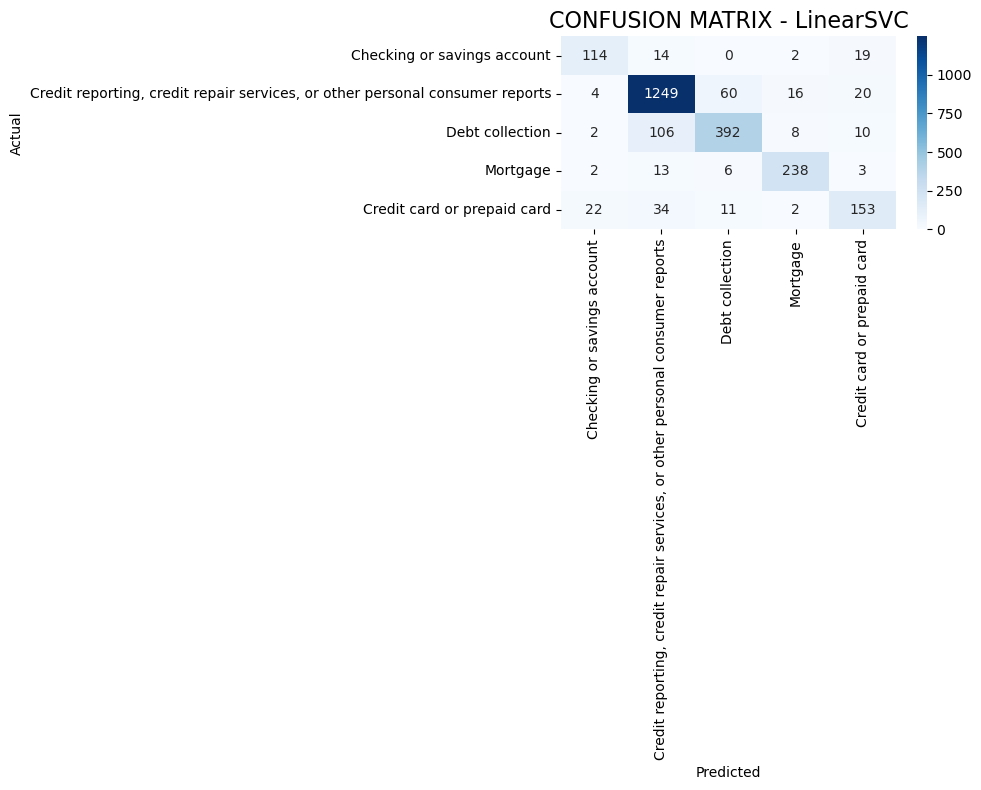


=== RandomForest ===

CLASSIFICATION REPORT:

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.00      0.00      0.00       149
Credit reporting, credit repair services, or other personal consumer reports       0.54      1.00      0.70      1349
                                                             Debt collection       1.00      0.00      0.00       518
                                                                    Mortgage       1.00      0.00      0.01       262
                                                 Credit card or prepaid card       0.00      0.00      0.00       222

                                                                    accuracy                           0.54      2500
                                                                   macro avg       0.51      0.20      0.14      2500
       

/Users/sarahpopeck/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sarahpopeck/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sarahpopeck/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



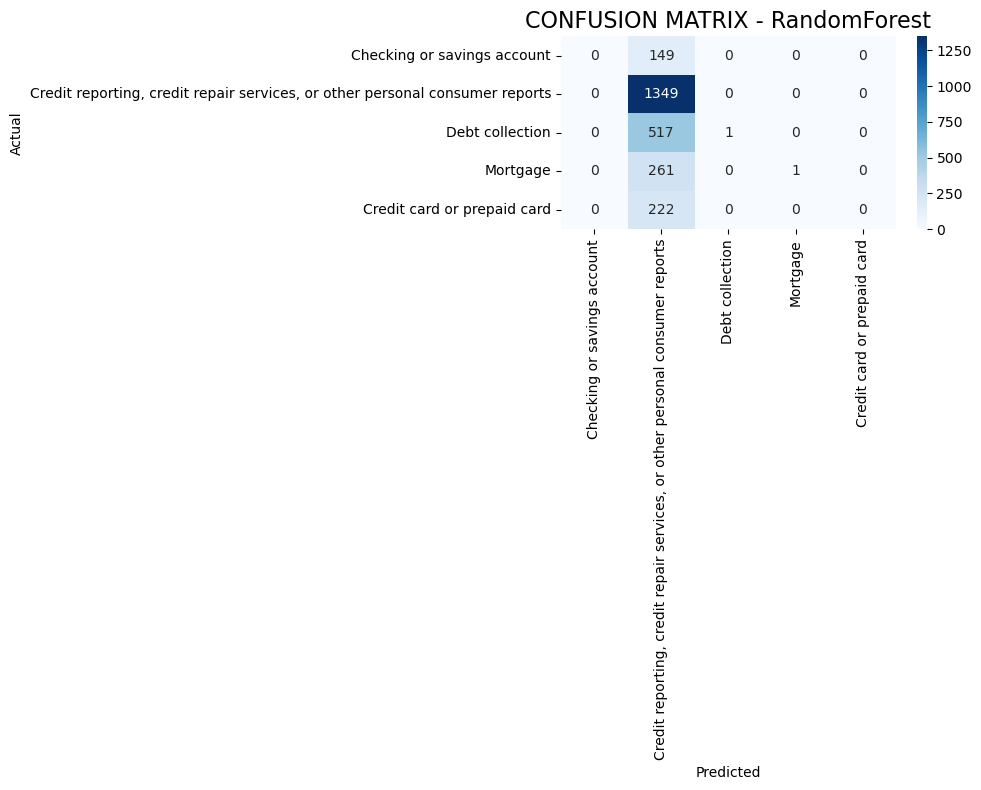


=== MultinomialNB ===

CLASSIFICATION REPORT:

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.97      0.25      0.40       149
Credit reporting, credit repair services, or other personal consumer reports       0.74      0.98      0.84      1349
                                                             Debt collection       0.79      0.55      0.65       518
                                                                    Mortgage       0.93      0.81      0.86       262
                                                 Credit card or prepaid card       0.78      0.33      0.46       222

                                                                    accuracy                           0.77      2500
                                                                   macro avg       0.84      0.58      0.64      2500
      

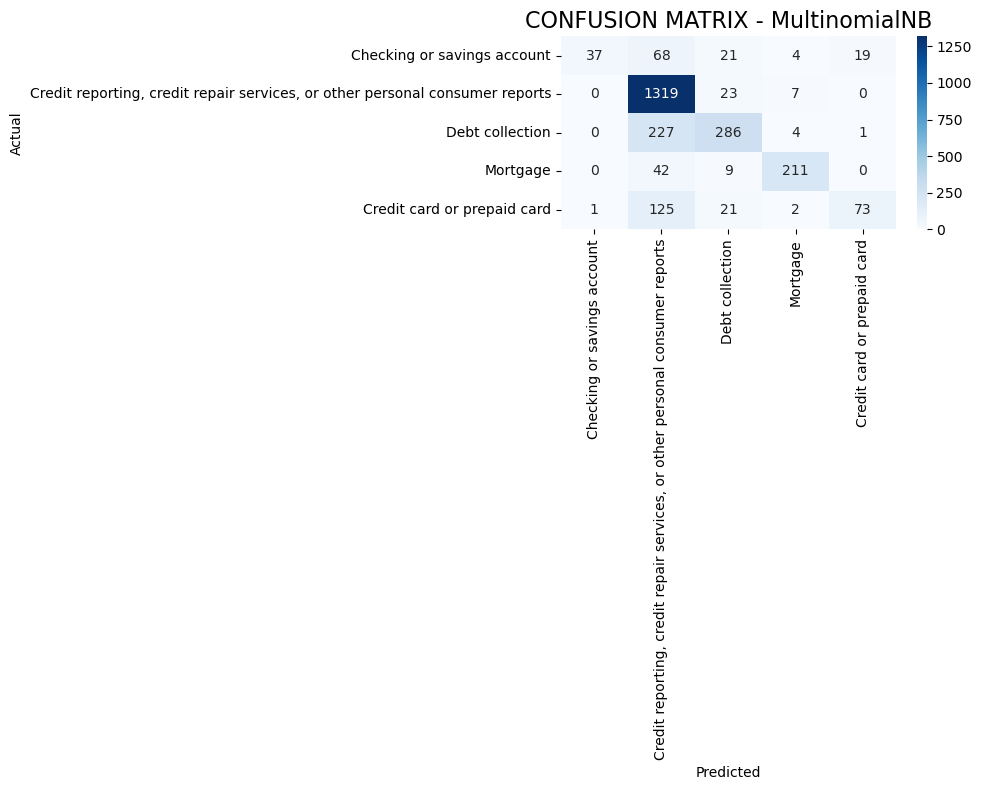


=== LogisticRegression ===

CLASSIFICATION REPORT:

                                                                              precision    recall  f1-score   support

                                                 Checking or savings account       0.86      0.74      0.80       149
Credit reporting, credit repair services, or other personal consumer reports       0.85      0.94      0.90      1349
                                                             Debt collection       0.84      0.72      0.78       518
                                                                    Mortgage       0.92      0.88      0.90       262
                                                 Credit card or prepaid card       0.80      0.69      0.74       222

                                                                    accuracy                           0.86      2500
                                                                   macro avg       0.86      0.79      0.82      2500
 

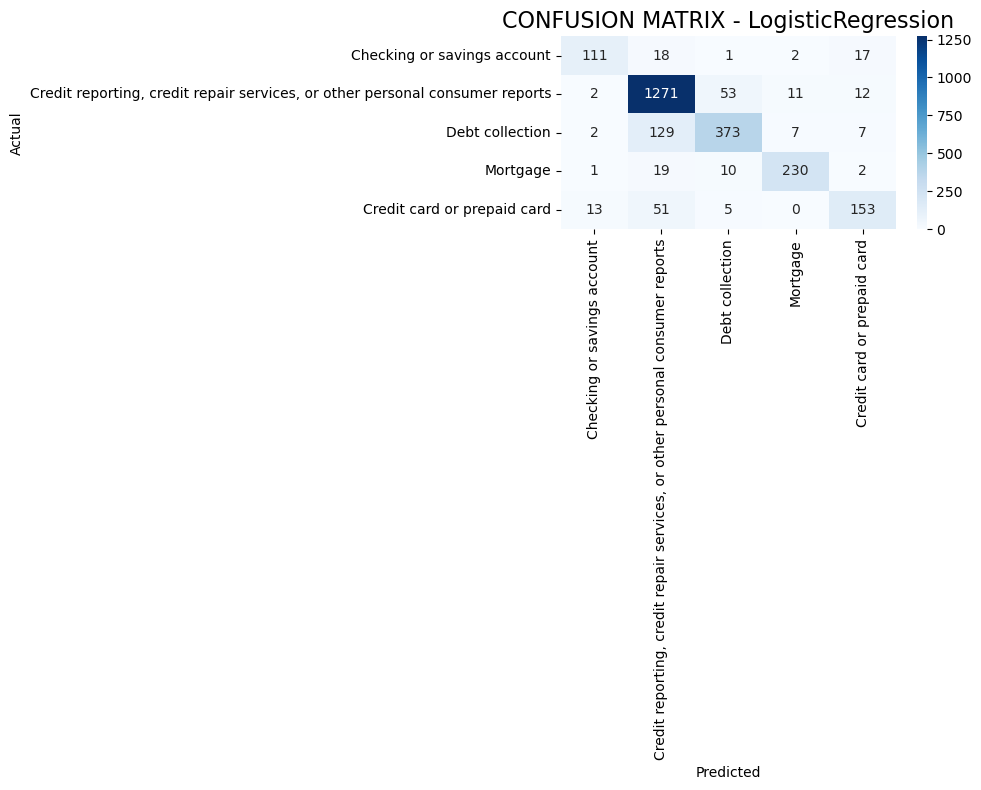

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# --- Preprocessing Function ---
def preprocessing_text(complaint):
    complaint = complaint.lower()
    complaint = re.sub(r'[^a-zA-Z\s]', '', complaint)
    complaint = re.sub(r'[x]{2,}', '', complaint)
    return complaint

selected_products = [
    "Credit reporting, credit repair services, or other personal consumer reports",
    "Debt collection",
    "Mortgage",
    "Credit card or prepaid card",
    "Checking or savings account"
]

df2 = df[df['Product'].isin(selected_products)][['Consumer complaint narrative', 'Product']].dropna()
df2 = df2.rename(columns={'Consumer complaint narrative': 'Consumer_complaint'})

# --- Sample 10,000 rows ---
df2 = df2.sample(n=10000, random_state=42)

# --- Map Product to Category ID ---
category_id_df = df2[['Product']].drop_duplicates().reset_index(drop=True)
category_id_df['category_id'] = category_id_df.index

df2 = df2.merge(category_id_df, on='Product')

# --- Apply Preprocessing ---
df2['Consumer_complaint'] = df2['Consumer_complaint'].apply(preprocessing_text)

# --- TF-IDF Vectorization ---
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

features = tfidf.fit_transform(df2.Consumer_complaint).toarray()
labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" % features.shape)

# --- Stratified Train-Test Split ---
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    features, labels, df2.index, 
    test_size=0.25, 
    stratify=labels, 
    random_state=1
)

# --- Define Models ---
models = {
    'LinearSVC': LinearSVC(),
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1),
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=1)
}

# --- Train and Evaluate Each Model ---
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\nCLASSIFICATION REPORT:\n")
    print(metrics.classification_report(y_test, y_pred, target_names=category_id_df['Product'].values))

    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
                xticklabels=category_id_df['Product'].values, 
                yticklabels=category_id_df['Product'].values)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"CONFUSION MATRIX - {name}", size=16)
    plt.tight_layout()
    plt.show()


# Hard voting because linear SVC doesn't support probabilities

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# --- Preprocessing Function (with lemmatization and stopword removal) ---
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def preprocess(self, complaint):
        complaint = complaint.lower()
        complaint = re.sub(r'[^a-zA-Z\s]', '', complaint)
        complaint = re.sub(r'[x]{2,}', '', complaint)
        words = complaint.split()
        words = [self.lemmatizer.lemmatize(w) for w in words if w not in self.stop_words]
        return ' '.join(words)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self.preprocess)

selected_products = [
    "Credit reporting, credit repair services, or other personal consumer reports",
    "Debt collection",
    "Mortgage",
    "Credit card or prepaid card",
    "Checking or savings account",
    "Student loan"
]

# Optionally increase sample size here
df2 = df[df['Product'].isin(selected_products)][['Consumer complaint narrative', 'Product']].dropna()
df2 = df2.rename(columns={'Consumer complaint narrative': 'Consumer_complaint'})

# --- Sample more rows if desired ---
df2 = df2.sample(n=10000, random_state=42)  # Adjusted to use 20,000 rows

# --- Map Product to Category ID ---
category_id_df = df2[['Product']].drop_duplicates().reset_index(drop=True)
category_id_df['category_id'] = category_id_df.index

df2 = df2.merge(category_id_df, on='Product')

# --- Apply Preprocessing ---
preprocessor = TextPreprocessor()
df2['Consumer_complaint'] = preprocessor.fit_transform(df2['Consumer_complaint'])

# --- TF-IDF Vectorization ---
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2))
features = tfidf.fit_transform(df2.Consumer_complaint).toarray()
labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" % features.shape)

# --- Stratified Train-Test Split ---
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    features, labels, df2.index, 
    test_size=0.25, 
    stratify=labels, 
    random_state=1
)

# --- Define Base Models ---
model1 = ('LinearSVC', LinearSVC())
model2 = ('RandomForest', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1))
model3 = ('MultinomialNB', MultinomialNB())
model4 = ('LogisticRegression', LogisticRegression(max_iter=1000, random_state=1))

# --- Weighted Hard Voting Ensemble ---
ensemble = VotingClassifier(estimators=[model1, model2, model3, model4],
                            voting='hard')

# --- Cross-Validation on Ensemble ---
cv_scores = cross_val_score(ensemble, features, labels, cv=5, scoring='accuracy')
print("\nCROSS-VALIDATION SCORES (5-Fold):", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# --- Train and Evaluate Ensemble ---
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

print("\nENSEMBLE CLASSIFICATION REPORT:\n")
print(metrics.classification_report(y_test, y_pred, target_names=category_id_df['Product'].values))

# --- Compare Confusion Matrices ---
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d', ax=axs[0],
            xticklabels=category_id_df['Product'].values, yticklabels=category_id_df['Product'].values)
axs[0].set_title("Confusion Matrix - Ensemble")
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

plt.tight_layout()
plt.show()


## Ensemble using Gradient Boosting and soft voting - couldn't handle size

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from sklearn.ensemble import GradientBoostingClassifier

# --- Preprocessing Function (with lemmatization and stopword removal) ---
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def preprocess(self, complaint):
        complaint = complaint.lower()
        complaint = re.sub(r'[^a-zA-Z\s]', '', complaint)
        complaint = re.sub(r'[x]{2,}', '', complaint)
        words = complaint.split()
        words = [self.lemmatizer.lemmatize(w) for w in words if w not in self.stop_words]
        return ' '.join(words)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self.preprocess)

# --- Select Products ---
selected_products = [
    "Credit reporting, credit repair services, or other personal consumer reports",
    "Debt collection",
    "Mortgage",
    "Credit card or prepaid card",
    "Checking or savings account",
    "Student loan"
]

# --- Load & Filter Data ---
df2 = df[df['Product'].isin(selected_products)][['Consumer complaint narrative', 'Product']].dropna()
df2 = df2.rename(columns={'Consumer complaint narrative': 'Consumer_complaint'})
df2 = df2.sample(n=20000, random_state=42)

# --- Map Product to Category ID ---
category_id_df = df2[['Product']].drop_duplicates().reset_index(drop=True)
category_id_df['category_id'] = category_id_df.index
df2 = df2.merge(category_id_df, on='Product')

# --- Apply Preprocessing ---
preprocessor = TextPreprocessor()
df2['Consumer_complaint'] = preprocessor.fit_transform(df2['Consumer_complaint'])

# --- TF-IDF Vectorization ---
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2))
features = tfidf.fit_transform(df2.Consumer_complaint).toarray()
labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" % features.shape)

# --- Stratified Train-Test Split ---
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    features, labels, df2.index,
    test_size=0.25,
    stratify=labels,
    random_state=1
)

# --- Define Base Models (all support predict_proba for soft voting) ---
model1 = ('RandomForest', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1))
model2 = ('MultinomialNB', MultinomialNB())
model3 = ('LogisticRegression1', LogisticRegression(max_iter=1000, random_state=1))
('GradientBoosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1))

# --- Soft Voting Ensemble ---
ensemble = VotingClassifier(
    estimators=[model1, model2, model3, model4],
    voting='soft'
)

# --- Cross-Validation ---
cv_scores = cross_val_score(ensemble, features, labels, cv=5, scoring='accuracy')
print("\nCROSS-VALIDATION SCORES (5-Fold):", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# --- Train and Evaluate Ensemble ---
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

print("\nSOFT VOTING ENSEMBLE CLASSIFICATION REPORT:\n")
print(metrics.classification_report(y_test, y_pred, target_names=category_id_df['Product'].values))

# --- Confusion Matrix ---
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df['Product'].values,
            yticklabels=category_id_df['Product'].values)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("CONFUSION MATRIX - Soft Voting Ensemble", size=16)
plt.tight_layout()
plt.show()


In [ ]:
import shap

# --- Feature Importance Visualization (Random Forest only) ---
feature_names = tfidf.get_feature_names_out()
importances = ensemble.named_estimators_['RandomForest'].feature_importances_
indices = np.argsort(importances)[-20:][::-1]  # Top 20 features

plt.figure(figsize=(10, 6))
plt.title("Top 20 Important Features (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


SHAP SUMMARY PLOTS



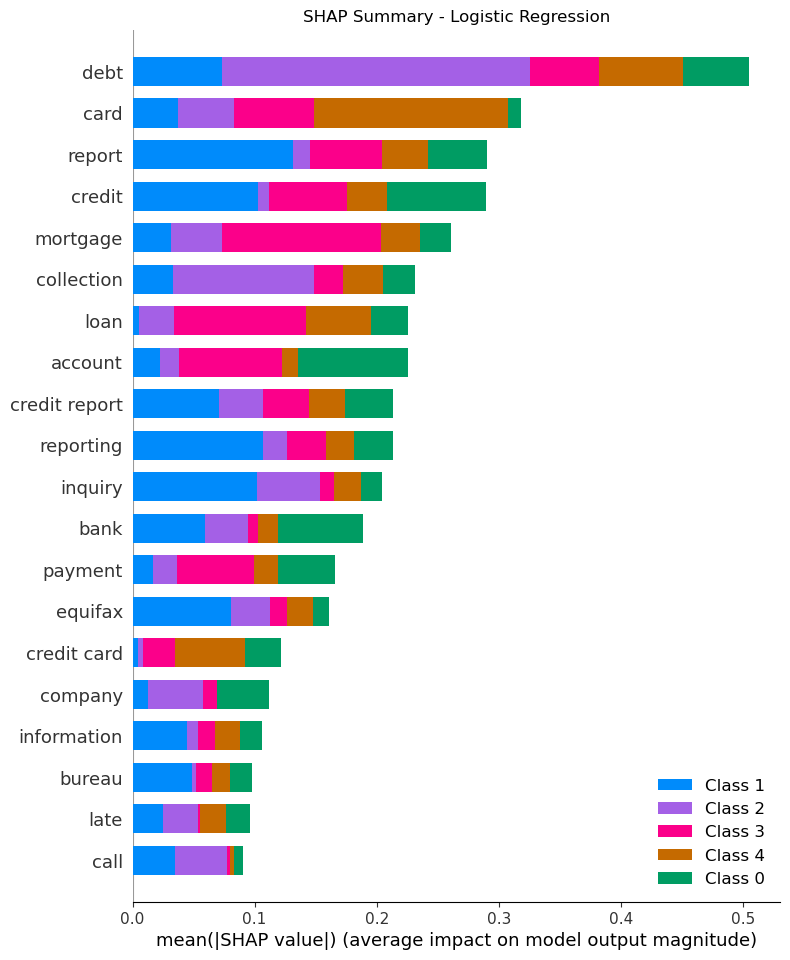

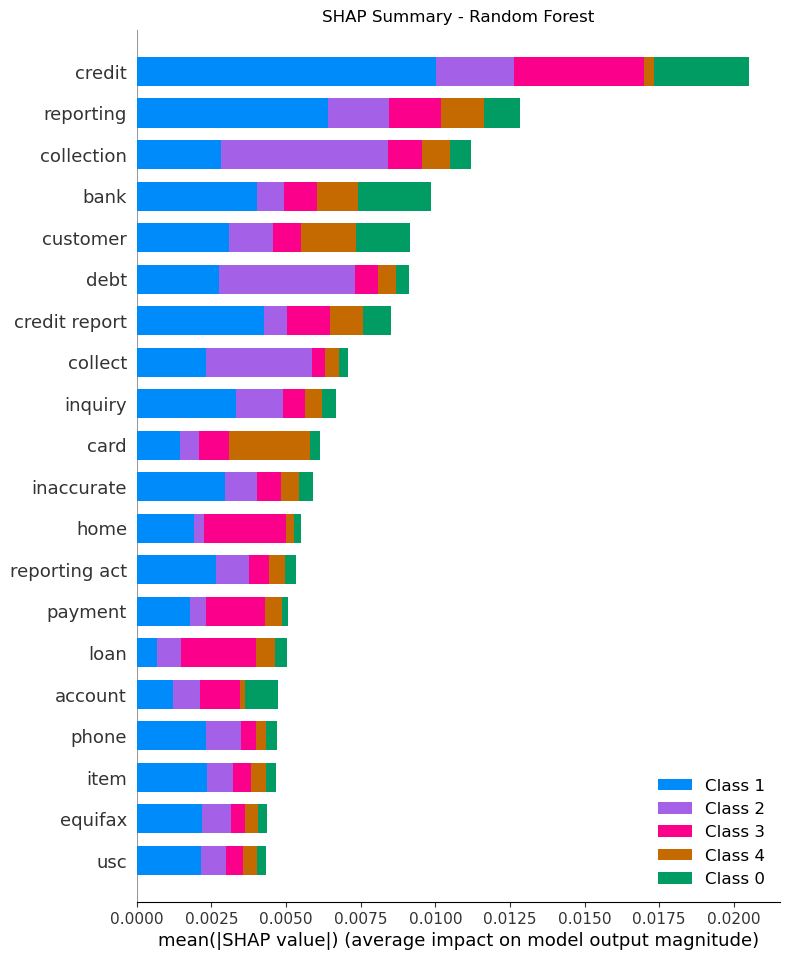

NameError: name 'explainer_nb' is not defined

In [9]:
# --- SHAP Explainers for Logistic Regression and Random Forest ---
print("\nSHAP SUMMARY PLOTS\n")

# Logistic Regression
explainer_lr = shap.Explainer(ensemble.named_estimators_['LogisticRegression'], X_train)
shap_values_lr = explainer_lr(X_test[:100])
shap.summary_plot(shap_values_lr, features=X_test[:100], feature_names=feature_names, show=False)
plt.title("SHAP Summary - Logistic Regression")
plt.show()

# Random Forest
explainer_rf = shap.Explainer(ensemble.named_estimators_['RandomForest'], X_train)
shap_values_rf = explainer_rf(X_test[:100])
shap.summary_plot(shap_values_rf, features=X_test[:100], feature_names=feature_names, show=False)
plt.title("SHAP Summary - Random Forest")
plt.show()

# Force plot for the first sample
shap.initjs()
shap.force_plot(explainer_nb.expected_value[0], shap_values_nb[0][0], X_test[0], feature_names=feature_names, matplotlib=True)
plt.title("SHAP Force Plot - MultinomialNB (First Test Sample)")
plt.show()

## Adaboost: Low accuracy rate, was not used

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier

# --- AdaBoost Model with Decision Tree ---
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=1)
adaboost_model.fit(X_train, y_train)
y_pred_ada = adaboost_model.predict(X_test)

print("\nADABOOST CLASSIFICATION REPORT:\n")
print(metrics.classification_report(y_test, y_pred_ada, target_names=category_id_df['Product'].values))

sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, cmap="Purples", fmt='d', ax=axs[1],
            xticklabels=category_id_df['Product'].values, yticklabels=category_id_df['Product'].values)
axs[1].set_title("Confusion Matrix - AdaBoost")
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')